In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
df = pd.read_csv("processed_magicBricks.csv")
df.head()

,Unnamed: 0,Unnamed: 0.1,city,price,water-availability,status-of-electricity,furnishing,bedrooms,bathrooms,status,...,locality-rating,verified_id,capacity,towers,units,Retirees,Family,Couple,SingleProfessionals,Students
0,0,0,Mumbai,13100000,1.0,2.0,1.0,4,4,0,...,45,1,4,6,1000,1,1,1,0,0
1,1,1,Mumbai,18700000,0.0,0.0,0.0,4,4,0,...,45,1,4,0,144,1,1,1,0,0
2,2,4,Mumbai,17500000,2.0,0.0,0.0,3,4,0,...,41,1,5,4,416,1,1,1,0,0
3,3,3,Mumbai,18900000,0.0,1.0,0.0,4,4,0,...,46,1,4,1,51,1,1,1,0,0
4,4,4,Mumbai,14900000,1.0,2.0,0.0,4,4,0,...,44,1,4,4,414,1,1,1,0,0


In [ ]:
print(df.columns)

Index(['Unnamed: 0', 'Unnamed: 0.1', 'city', 'price', 'water-availability',
       'status-of-electricity', 'furnishing', 'bedrooms', 'bathrooms',
       'status', 'neighborhood', 'roads', 'safety', 'cleanliness',
       'public-transport', 'parking', 'connectivity', 'traffic', 'school',
       'restaurants', 'hospital', 'market', 'locality-rating', 'verified_id',
       'capacity', 'towers', 'units', 'Retirees', 'Family', 'Couple',
       'SingleProfessionals', 'Students'],
      dtype='object')


##segmentation analysis in term of geographic 

In [ ]:
feature1 = ['city','neighborhood','traffic', 'towers', 'units']
feature2 = ['Retirees', 'Family', 'Couple','SingleProfessionals', 'Students']
feature3 = ['safety', 'cleanliness','locality-rating']
feature4 = ['water-availability','status-of-electricity','furnishing', 'bedrooms', 'bathrooms','roads','parking']

In [ ]:
df.pop('Unnamed: 0')
df.pop('Unnamed: 0.1')

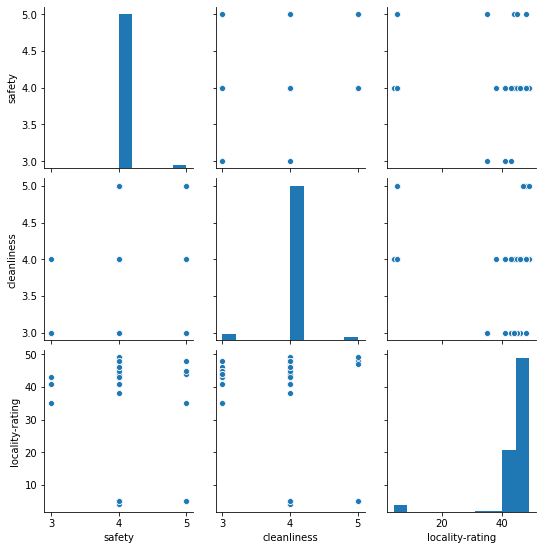

In [ ]:
#plot the pair plot of safety, cleanliness,locality-rating in data dataframe.
sns.pairplot(data = df, vars=['safety', 'cleanliness','locality-rating'])
plt.show()

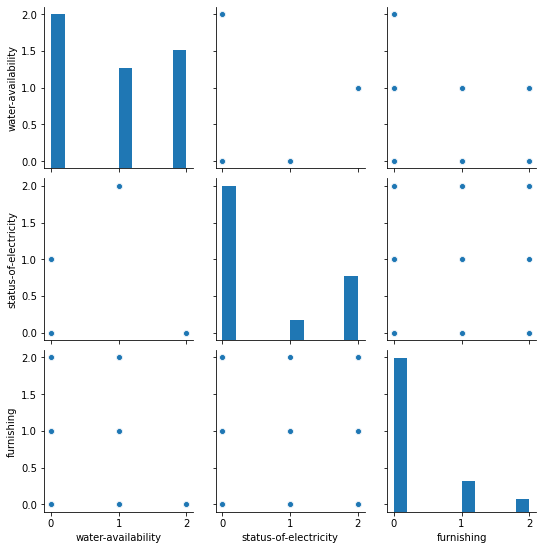

In [ ]:
#plot the pair plot of water-availability, status-of-electricity,furnishingin data dataframe.
sns.pairplot(data = df, vars=['water-availability','status-of-electricity','furnishing'])
plt.show()

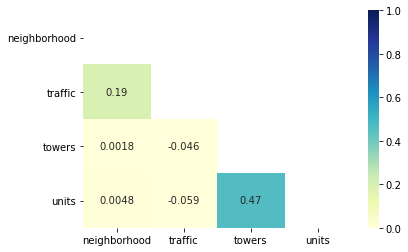

In [ ]:
# creating mask
mask = np.triu(np.ones_like(df[feature1].corr()))
 
# plotting a triangle correlation heatmap
dataplot = sns.heatmap(df[feature1].corr(), vmin=0, vmax=1, cmap="YlGnBu", annot=True, mask=mask)
 
# displaying heatmap
plt.show()

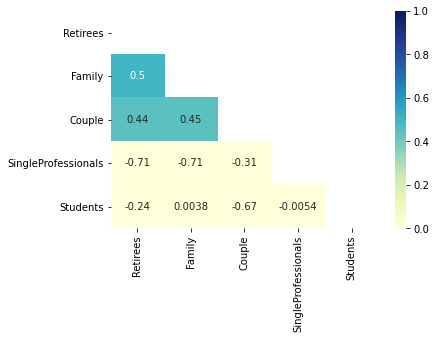

In [ ]:
# creating mask
mask = np.triu(np.ones_like(df[feature2].corr()))
 
# plotting a triangle correlation heatmap
dataplot = sns.heatmap(df[feature2].corr(), vmin=0, vmax=1, cmap="YlGnBu", annot=True, mask=mask)
 
# displaying heatmap
plt.show()

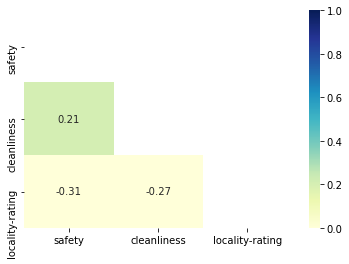

In [ ]:
# creating mask
mask = np.triu(np.ones_like(df[feature3].corr()))
 
# plotting a triangle correlation heatmap
dataplot = sns.heatmap(df[feature3].corr(), vmin=0, vmax=1, cmap="YlGnBu", annot=True, mask=mask)
 
# displaying heatmap
plt.show()

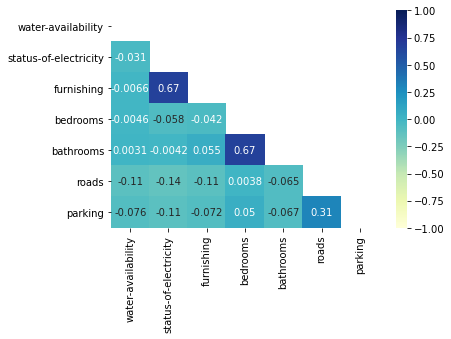

In [ ]:
# creating mask
mask = np.triu(np.ones_like(df[feature4].corr()))
 
# plotting a triangle correlation heatmap
dataplot = sns.heatmap(df[feature4].corr(), vmin=-1, vmax=1, cmap="YlGnBu", annot=True, mask=mask)
 
# displaying heatmap
plt.show()

# Detect and remove outlier in price

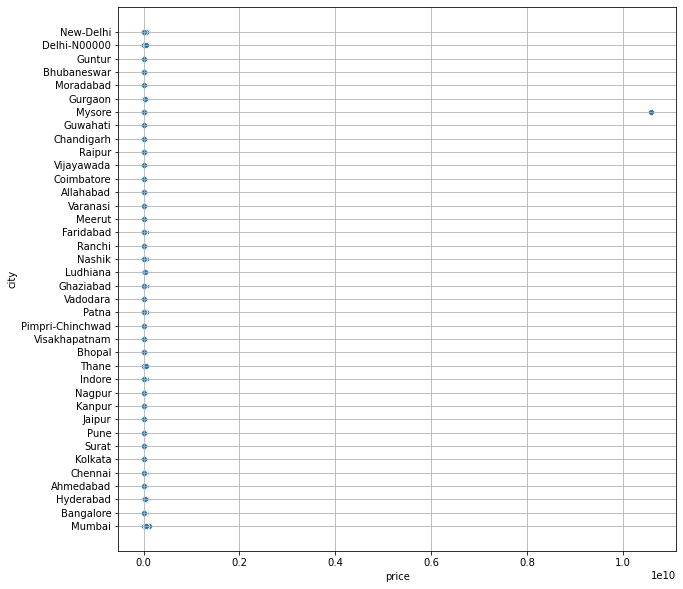

In [ ]:
plt.figure(figsize=(10,10))
sns.scatterplot(x=df['price'],y=df['city'])
plt.grid()
plt.show()

In [ ]:
print("Highest allowed",df['price'].mean() + 3*df['price'].std())
print("Lowest allowed",df['price'].mean() - 3*df['price'].std())

Highest allowed 1417122014.8619692
Lowest allowed -1355531633.1825798


In [ ]:
df[(df['price'] > 1417122014.8619692 ) | (df['price'] < -1355531633.1825798)]

,city,price,water-availability,status-of-electricity,furnishing,bedrooms,bathrooms,status,neighborhood,roads,...,locality-rating,verified_id,capacity,towers,units,Retirees,Family,Couple,SingleProfessionals,Students
450,Mysore,10585000000,0.0,0.0,0.0,4,4,3,4,4,...,44,1,4,4,65,1,1,1,0,0


In [ ]:
data = df.drop(labels=450, axis=0, inplace=True)

In [ ]:
df = df[(df['price'] < 1417122014.8619692  ) & (df['price'] >-1355531633.1825798)]

In [ ]:
upper_limit = df['price'].mean() + 3*df['price'].std()
lower_limit = df['price'].mean() - 3*df['price'].std()

In [ ]:
df['price'] = np.where(
    df['price']>upper_limit,
    upper_limit,
    np.where(
        df['price']<lower_limit,
        lower_limit,
        df['price']
    )
)

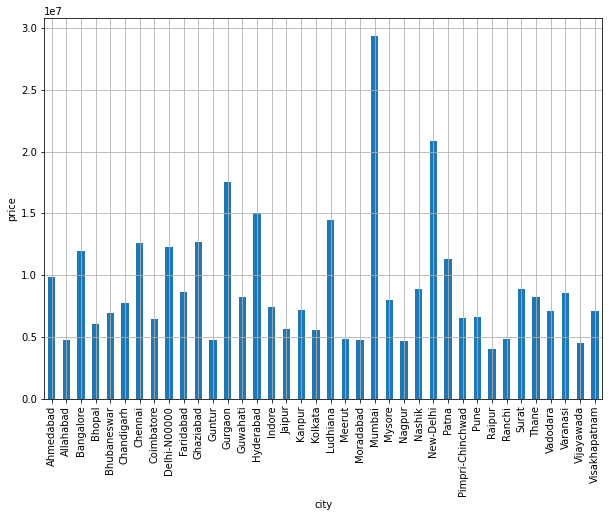

In [ ]:
#Average rent of houses in each city
plt.figure(figsize=(10,7))
df.groupby('city')['price'].mean().plot.bar()
plt.ylabel("price")
plt.grid()